In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [2]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Converting string values into ints

In [6]:
# Converting hotel types from str to int

df.hotel = df.hotel.map({'City Hotel':0, 'Resort Hotel':1})
df.hotel.unique()

array([1, 0], dtype=int64)

In [7]:
# Converting month from str to int

df.arrival_date_month = df.arrival_date_month.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12})

In [8]:
# Creating a timeseries date and extraction of weekdays

df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [9]:
df['weekday'] = df['date'].dt.weekday

In [10]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [11]:
# Converting meal from str to int
df.meal = df.meal.map({'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4})

df.meal.unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [12]:
# Converting country from str to int using LabelEncoder

df.country = df.country.fillna('O')     # Filling Null values for the LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df.country.unique()

array([136,  59, 170,  51,  76,  56, 127, 140, 124, 128,   6, 134,  43,
        15,  29,  34,  66,  81, 123,  46, 141, 155,  11,  52,  42,  25,
        54, 113,  27, 100, 154,   3,  75,  31, 107, 103, 167, 149, 101,
       135, 150,  30,  12,  23,  99, 163, 175,   1,  80,  40, 176,  37,
       177,  48,  91,  38,  72,   5, 162,  82,  71,  69,  77,  60,   4,
        63, 169,  83,  28,  41,  35,  61,  92, 121, 106, 172, 153,  55,
        86, 129,  73,  94, 132, 145, 156,  13,  20, 126, 159,  47, 108,
       117,   7,  85,  98,  39,  33,  22, 115,  36, 152, 166,  19,  32,
        84, 157, 146,  14, 143, 174, 133, 139,  50, 131, 110, 116,  49,
       105,  79, 171, 125,  21, 102, 158, 164,  44, 151,  90,  53,  78,
        70, 142,  88, 104,  18,  74, 160, 122,  16, 173, 165,  58,  62,
       161,  64,  87,  97,  65, 112, 168, 118,  57, 111, 130,  17,  95,
       109, 119,  24, 137,  26,   0,   2, 148,  45, 138,  68,  96,   9,
        67,   8, 114, 120,  89, 144,  10, 147,  93])

In [13]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [14]:
# Converting market_segment from str to int

le = LabelEncoder()
df['market_segment'] = le.fit_transform(df['market_segment'])
df.market_segment.unique()

array([3, 2, 6, 5, 1, 4, 7, 0])

In [15]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [16]:
# Converting distribution_channel from str to int

df.distribution_channel = df.distribution_channel.map({'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})
df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [17]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [18]:
# Converting reserved_room_type from str to int

le = LabelEncoder()
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])
df.reserved_room_type.unique()

array([2, 0, 3, 4, 6, 5, 7, 8, 9, 1])

In [19]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [20]:
# Converting assigned_room_type from str to int

le = LabelEncoder()
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
df.assigned_room_type.unique()

array([ 2,  0,  3,  4,  6,  5,  8,  1,  7, 11, 10,  9])

In [21]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [22]:
# Converting deposit_type from str to int

df.deposit_type = df.deposit_type.map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
df.deposit_type.unique()

array([0, 1, 2], dtype=int64)

In [23]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [24]:
# Converting customer_type from str to int

df.customer_type = df.customer_type.map({'Transient':1, 'Transient-Party':2, 'Contract':3, 'Group':4})
df.customer_type.unique()

array([1, 3, 2, 4], dtype=int64)

In [25]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [26]:
# Converting reservation_status from str to int

df.reservation_status = df.reservation_status.map({'No-Show':0, 'Check-Out':1, 'Canceled':2})
df.reservation_status.unique()

array([1, 2, 0], dtype=int64)

In [27]:
df.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [28]:
# Removing a few outliers - made the results worse!
# df = df[~(df.required_car_parking_spaces > 3)]  # 2 bookings had a requirement of 8 car parking spaces
# df = df[~(df.adr == df.adr.max())]              # 1 booking had a daily rate of 5400

In [29]:
# Filling missing values with 0

df.children = df.children.fillna(0)
df.children = df.children.astype(int)

df.agent = df.agent.fillna(0)
df.agent = df.agent.astype(int)

df.company = df.company.fillna(0)
df.company = df.company.astype(int)

df.adr = df.adr.astype(int)

In [30]:
# Adults, babies and children cant be 0 at same time, so these rows have to be dropped

ghost_filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df = df[~ghost_filter]

<AxesSubplot:>

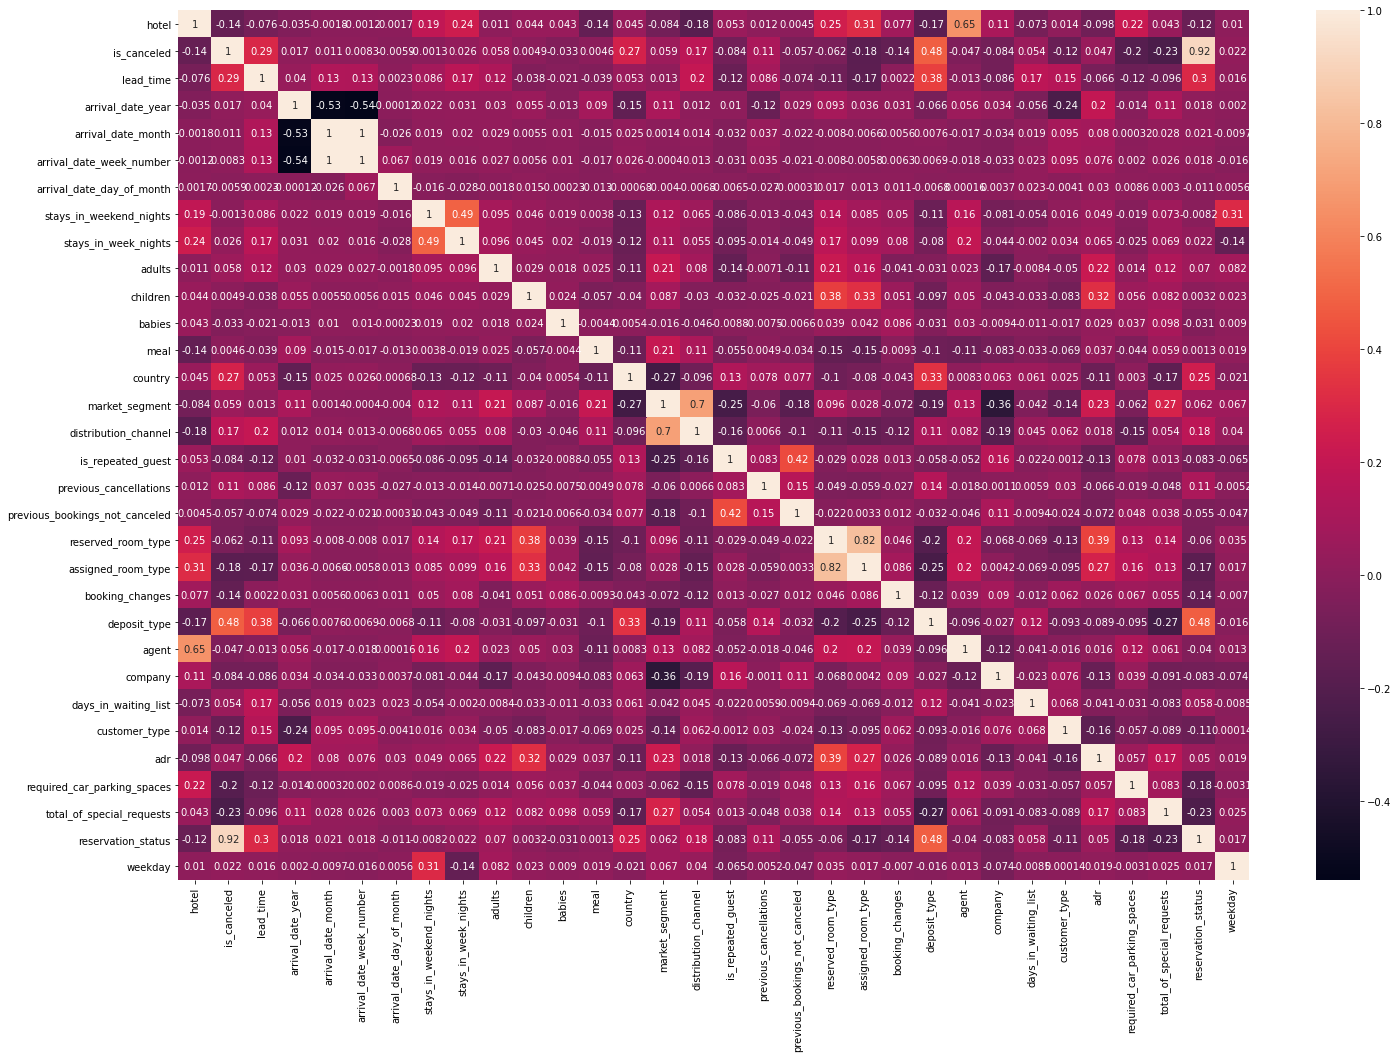

In [31]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [32]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
reservation_status                0.917176
deposit_type                      0.480483
lead_time                         0.292876
country                           0.269327
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
assigned_room_type                0.175843
distribution_channel              0.171416
booking_changes                   0.144832
hotel                             0.137082
customer_type                     0.122024
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
reserved_room_type                0.062216
market_segment                    0.059419
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046858
agent                             0.046770
babies                            0.032569
stays_in_we

In [33]:
df = df.drop(['reservation_status', 'reservation_status_date', 'date'], axis = 1)

In [34]:
df.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,weekday
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.335937,0.370766,104.109227,2016.156472,6.552051,27.163376,15.798717,0.927053,2.499195,1.859206,...,0.218799,0.246087,74.889078,10.735400,2.321215,1.293214,101.764542,0.062553,0.571504,2.996242
std,0.472319,0.483012,106.875450,0.707485,3.089796,13.601107,8.781070,0.995117,1.897106,0.575186,...,0.638504,0.655942,107.168884,53.830143,17.598002,0.551769,50.421738,0.245360,0.792876,1.951995
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,69.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,94.000000,0.000000,0.000000,3.000000
75%,1.000000,1.000000,161.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,152.000000,0.000000,0.000000,1.000000,126.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,18.000000,2.000000,535.000000,543.000000,391.000000,4.000000,5400.000000,8.000000,5.000000,6.000000


In [35]:
from scipy import stats
df_o = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [36]:
df_o.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,weekday
count,87375.000000,87375.000000,87375.000000,87375.000000,87375.000000,87375.000000,87375.000000,87375.000000,87375.000000,87375.000000,...,87375.000000,87375.000000,87375.000000,87375.000000,87375.000000,87375.000000,87375.000000,87375.0,87375.000000,87375.000000
mean,0.271611,0.411090,101.956658,2016.169362,6.469574,26.800309,15.792092,0.874850,2.333791,1.870180,...,0.146529,0.269814,68.051330,1.332189,0.643479,1.219262,100.778953,0.0,0.503840,3.039153
std,0.444793,0.492034,97.182516,0.695345,3.074708,13.517347,8.740143,0.862556,1.459316,0.470822,...,0.422909,0.682976,98.845904,11.471143,4.922813,0.413749,40.968900,0.0,0.680696,1.953728
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,23.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,73.000000,0.0,0.000000,1.000000
50%,0.000000,0.000000,72.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,95.000000,0.0,0.000000,3.000000
75%,1.000000,1.000000,158.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,98.000000,0.000000,0.000000,1.000000,124.000000,0.0,1.000000,5.000000
max,1.000000,1.000000,424.000000,2017.000000,12.000000,53.000000,31.000000,3.000000,8.000000,3.000000,...,2.000000,2.000000,394.000000,169.000000,55.000000,2.000000,253.000000,0.0,2.000000,6.000000


<AxesSubplot:>

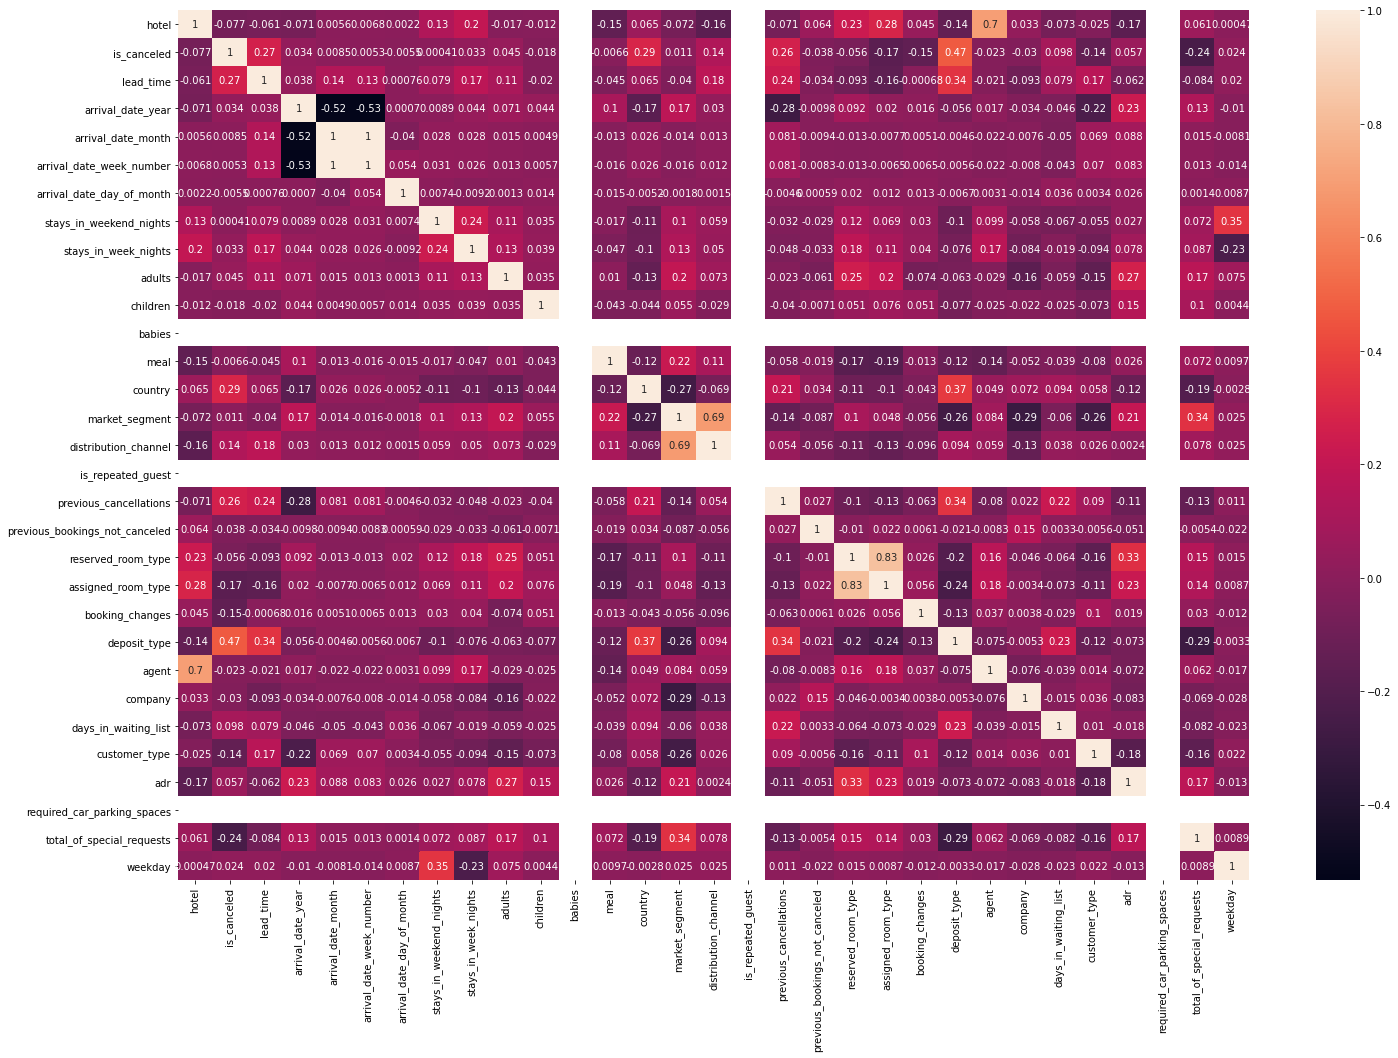

In [37]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_o.corr(), annot=True, ax = ax)

In [38]:
correlation = df_o.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
deposit_type                      0.468041
country                           0.289988
lead_time                         0.269012
previous_cancellations            0.264434
total_of_special_requests         0.243079
assigned_room_type                0.169677
booking_changes                   0.148460
customer_type                     0.142272
distribution_channel              0.136578
days_in_waiting_list              0.098026
hotel                             0.076979
adr                               0.056655
reserved_room_type                0.056052
adults                            0.045205
previous_bookings_not_canceled    0.038124
arrival_date_year                 0.034044
stays_in_week_nights              0.033099
company                           0.029658
weekday                           0.023534
agent                             0.022925
children                          0.018361
market_segment                    0.011255
arrival_dat

In [46]:
# CANCELLATION PREDICTION - ALL DATA BUT WITHOUT RESERVATION_STATUS

In [48]:
X = df_o.drop(['is_canceled'], axis = 1)
y = df_o['is_canceled']
y = np.array(y)

In [49]:
# Scaling

X_scaled = StandardScaler().fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 4)

In [51]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, model_lr_prediction)

conf_lr = confusion_matrix(y_test, model_lr_prediction)
clf_report_lr = classification_report(y_test, model_lr_prediction)

print(f"Accuracy Score of Logistic Regression is : {accuracy_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

Accuracy Score of Logistic Regression is : 0.7728183118741059
Confusion Matrix : 
[[9207 1099]
 [2871 4298]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.89      0.82     10306
           1       0.80      0.60      0.68      7169

    accuracy                           0.77     17475
   macro avg       0.78      0.75      0.75     17475
weighted avg       0.78      0.77      0.77     17475



In [52]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.5121552509627683

Feature: 0, Score: 0.04227
Feature: 1, Score: 0.36073
Feature: 2, Score: 0.18439
Feature: 3, Score: -0.16538
Feature: 4, Score: 0.21604
Feature: 5, Score: -0.02467
Feature: 6, Score: 0.00450
Feature: 7, Score: 0.07873
Feature: 8, Score: 0.08741
Feature: 9, Score: 0.05837
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.05283
Feature: 12, Score: 0.48436
Feature: 13, Score: 0.64002
Feature: 14, Score: -0.17623
Feature: 15, Score: 0.00000
Feature: 16, Score: 1.20624
Feature: 17, Score: -0.24287
Feature: 18, Score: 0.71353
Feature: 19, Score: -0.85685
Feature: 20, Score: -0.22305
Feature: 21, Score: 1.77512
Feature: 22, Score: 0.03306
Feature: 23, Score: 0.07284
Feature: 24, Score: -0.06159
Feature: 25, Score: -0.23311
Feature: 26, Score: 0.18491
Feature: 27, Score: 0.00000
Feature: 28, Score: -0.54092
Feature: 29, Score: 0.08649


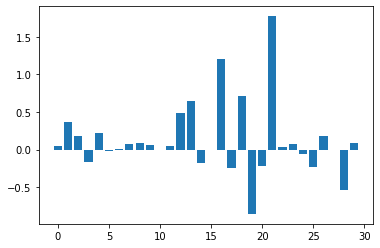

In [53]:
#Feature Importance

# Get importance
importance = model_lr.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [54]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_lr)):
    if feature_lr[i]<0:
        feature_lr[i] = feature_lr[i]*(-1)

feature_lr = pd.DataFrame(feature_lr)
feature_lr.reset_index(inplace=True)
feature_lr.columns = ['feature', 'score']
feature_lr['feature_name'] = X.columns
feature_lr.sort_values(by=['score'], ascending = False, inplace=True)
feature_lr.reset_index(drop = True, inplace = True)
feature_lr

,feature,score,feature_name
0,21,1.775120,deposit_type
1,16,1.206243,previous_cancellations
2,19,0.856849,assigned_room_type
3,18,0.713526,reserved_room_type
4,13,0.640018,market_segment
5,28,0.540915,total_of_special_requests
6,12,0.484363,country
7,1,0.360734,lead_time
8,17,0.242873,previous_bookings_not_canceled
9,25,0.233105,customer_type


In [57]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, model_dt_prediction)

conf_dt = confusion_matrix(y_test, model_dt_prediction)
clf_report_dt = classification_report(y_test, model_dt_prediction)

print(f"Accuracy Score of Decision Tree is : {accuracy_dt}")
print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

Accuracy Score of Decision Tree is : 0.8456080114449214
Confusion Matrix : 
[[8937 1369]
 [1329 5840]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     10306
           1       0.81      0.81      0.81      7169

    accuracy                           0.85     17475
   macro avg       0.84      0.84      0.84     17475
weighted avg       0.85      0.85      0.85     17475



In [58]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.68120479448548

Feature: 0, Score: 0.00351
Feature: 1, Score: 0.13090
Feature: 2, Score: 0.02355
Feature: 3, Score: 0.01326
Feature: 4, Score: 0.05184
Feature: 5, Score: 0.05082
Feature: 6, Score: 0.01526
Feature: 7, Score: 0.02978
Feature: 8, Score: 0.00903
Feature: 9, Score: 0.00338
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00948
Feature: 12, Score: 0.10526
Feature: 13, Score: 0.04328
Feature: 14, Score: 0.00264
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.03066
Feature: 17, Score: 0.00108
Feature: 18, Score: 0.00987
Feature: 19, Score: 0.01447
Feature: 20, Score: 0.01385
Feature: 21, Score: 0.22115
Feature: 22, Score: 0.05413
Feature: 23, Score: 0.00083
Feature: 24, Score: 0.00013
Feature: 25, Score: 0.01701
Feature: 26, Score: 0.06753
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.05030
Feature: 29, Score: 0.02698


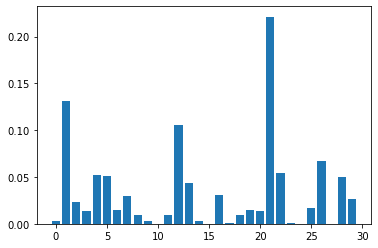

In [59]:
#Feature Importance

# get importance

importance = model_dt.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [60]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_dt)):
    if feature_dt[i]<0:
        feature_dt[i] = feature_dt[i]*(-1)

feature_dt = pd.DataFrame(feature_dt)
feature_dt.reset_index(inplace=True)
feature_dt.columns = ['feature', 'score']
feature_dt['feature_name'] = X.columns
feature_dt.sort_values(by=['score'], ascending = False, inplace=True)
feature_dt.reset_index(drop = True, inplace = True)
feature_dt

,deposit_type,lead_time,country,adr,agent,arrival_date_week_number,arrival_date_day_of_month,total_of_special_requests,market_segment,previous_cancellations,stays_in_week_nights,weekday,arrival_date_year,customer_type,stays_in_weekend_nights
2,0,7,59,75,0,27,1,0,3,0,1,2,2015,1,0
3,0,13,59,75,304,27,1,0,2,0,1,2,2015,1,0
4,0,14,59,98,240,27,1,1,6,0,2,2,2015,1,0
5,0,14,59,98,240,27,1,1,6,0,2,2,2015,1,0
6,0,0,136,107,0,27,1,0,3,0,2,2,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,21,15,96,394,35,30,2,5,0,5,2,2017,1,2
119385,0,23,15,96,394,35,30,0,5,0,5,2,2017,1,2
119386,0,102,56,225,9,35,31,2,6,0,5,3,2017,1,2
119388,0,109,59,104,89,35,31,0,6,0,5,3,2017,1,2


Maximum:  0.9633867276887872
Mean:  0.8043009310771945


<AxesSubplot:>

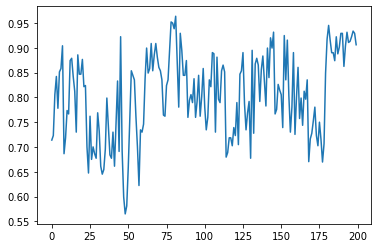

In [61]:
# K-Fold DecisionTree
model_kfdt = cross_val_score(tree.DecisionTreeClassifier(max_depth =8), X, y, cv=200)   # Best result with max_depth =5), X, y, cv=25
print('Maximum: ', model_kfdt.max())
print('Mean: ', model_kfdt.mean())

model_kfdt = pd.Series(model_kfdt)
model_kfdt.plot()

In [62]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, model_knn_prediction)

conf_knn = confusion_matrix(y_test, model_knn_prediction)
clf_report_knn = classification_report(y_test, model_knn_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

Accuracy Score of Ada Boost Classifier is : 0.8186552217453505
Confusion Matrix : 
[[8845 1461]
 [1708 5461]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     10306
           1       0.79      0.76      0.78      7169

    accuracy                           0.82     17475
   macro avg       0.81      0.81      0.81     17475
weighted avg       0.82      0.82      0.82     17475



In [63]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.6232580473835998

In [64]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.8835479256080114

In [65]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.7567743040976617

Feature: 0, Score: 0.00802
Feature: 1, Score: 0.12543
Feature: 2, Score: 0.02343
Feature: 3, Score: 0.03107
Feature: 4, Score: 0.05208
Feature: 5, Score: 0.05352
Feature: 6, Score: 0.01970
Feature: 7, Score: 0.03289
Feature: 8, Score: 0.01291
Feature: 9, Score: 0.00410
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.01350
Feature: 12, Score: 0.12192
Feature: 13, Score: 0.04566
Feature: 14, Score: 0.00772
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.02971
Feature: 17, Score: 0.00047
Feature: 18, Score: 0.01403
Feature: 19, Score: 0.02435
Feature: 20, Score: 0.01840
Feature: 21, Score: 0.11127
Feature: 22, Score: 0.05695
Feature: 23, Score: 0.00141
Feature: 24, Score: 0.00155
Feature: 25, Score: 0.02368
Feature: 26, Score: 0.07514
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.05918
Feature: 29, Score: 0.03192


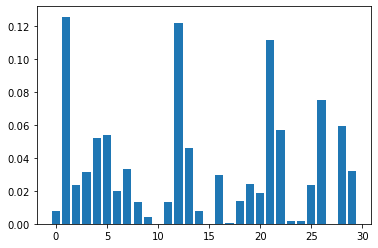

In [66]:
#Feature Importance

# get importance

importance = model_rf.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [67]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_rf)):
    if feature_rf[i]<0:
        feature_rf[i] = feature_rf[i]*(-1)

feature_rf = pd.DataFrame(feature_rf)
feature_rf.reset_index(inplace=True)
feature_rf.columns = ['feature', 'score']
feature_rf['feature_name'] = X.columns
feature_rf.sort_values(by=['score'], ascending = False, inplace=True)
feature_rf.reset_index(drop = True, inplace = True)
feature_rf

,lead_time,country,deposit_type,adr,total_of_special_requests,agent,arrival_date_day_of_month,arrival_date_week_number,market_segment,stays_in_week_nights,weekday,arrival_date_month,previous_cancellations,assigned_room_type,customer_type
2,7,59,0,75,0,0,1,27,3,1,2,7,0,2,1
3,13,59,0,75,0,304,1,27,2,1,2,7,0,0,1
4,14,59,0,98,1,240,1,27,6,2,2,7,0,0,1
5,14,59,0,98,1,240,1,27,6,2,2,7,0,0,1
6,0,136,0,107,0,0,1,27,3,2,2,7,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,21,15,0,96,2,394,30,35,5,5,2,8,0,0,1
119385,23,15,0,96,0,394,30,35,5,5,2,8,0,0,1
119386,102,56,0,225,2,9,31,35,6,5,3,8,0,4,1
119388,109,59,0,104,0,89,31,35,6,5,3,8,0,0,1


In [68]:
# Ada Boost
model_ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)
model_ada_prediction = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, model_ada_prediction)

conf_ada = confusion_matrix(y_test, model_ada_prediction)
clf_report_ada = classification_report(y_test, model_ada_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_ada}")
print(f"Confusion Matrix : \n{conf_ada}")
print(f"Classification Report : \n{clf_report_ada}")

Accuracy Score of Ada Boost Classifier is : 0.8239198855507869
Confusion Matrix : 
[[9239 1067]
 [2010 5159]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     10306
           1       0.83      0.72      0.77      7169

    accuracy                           0.82     17475
   macro avg       0.82      0.81      0.81     17475
weighted avg       0.82      0.82      0.82     17475



In [69]:
kappa_ada = cohen_kappa_score(y_test, model_ada_prediction)
kappa_ada

0.6286799370402041

In [70]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb_prediction = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, model_gb_prediction)
conf_gb = confusion_matrix(y_test, model_gb_prediction)
clf_report_gb = classification_report(y_test, model_gb_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

Accuracy Score of Ada Boost Classifier is : 0.8393705293276109
Confusion Matrix : 
[[9327  979]
 [1828 5341]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     10306
           1       0.85      0.75      0.79      7169

    accuracy                           0.84     17475
   macro avg       0.84      0.83      0.83     17475
weighted avg       0.84      0.84      0.84     17475



In [71]:
kappa_gb = cohen_kappa_score(y_test, model_gb_prediction)
kappa_gb

0.6619508344060401

In [72]:
# XgBoost Classifier
model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
model_xgb_prediction = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
conf_xgb = confusion_matrix(y_test, model_xgb_prediction)
clf_report_xgb = classification_report(y_test, model_xgb_prediction)

print(f"Accuracy Score of XgBoost Classifier is : {accuracy_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[13:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of XgBoost Classifier is : 0.8605436337625179
Confusion Matrix : 
[[9290 1016]
 [1421 5748]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     

In [73]:
kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)
kappa_xgb

0.7093005892962558

In [74]:
# Cat Boost Classifier
model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
model_cat_prediction = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, model_cat_prediction)
conf_cat = confusion_matrix(y_test, model_cat_prediction)
clf_report_cat = classification_report(y_test, model_cat_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")

Learning rate set to 0.5
0:	learn: 0.4628739	total: 417ms	remaining: 41.2s
1:	learn: 0.4281764	total: 489ms	remaining: 24s
2:	learn: 0.4022653	total: 526ms	remaining: 17s
3:	learn: 0.3831860	total: 569ms	remaining: 13.7s
4:	learn: 0.3774881	total: 609ms	remaining: 11.6s
5:	learn: 0.3721309	total: 650ms	remaining: 10.2s
6:	learn: 0.3659243	total: 690ms	remaining: 9.17s
7:	learn: 0.3620487	total: 727ms	remaining: 8.36s
8:	learn: 0.3553893	total: 771ms	remaining: 7.8s
9:	learn: 0.3527146	total: 808ms	remaining: 7.27s
10:	learn: 0.3501910	total: 846ms	remaining: 6.84s
11:	learn: 0.3463625	total: 881ms	remaining: 6.46s
12:	learn: 0.3442202	total: 915ms	remaining: 6.12s
13:	learn: 0.3430405	total: 950ms	remaining: 5.84s
14:	learn: 0.3412562	total: 986ms	remaining: 5.59s
15:	learn: 0.3394359	total: 1.02s	remaining: 5.38s
16:	learn: 0.3380056	total: 1.06s	remaining: 5.16s
17:	learn: 0.3348774	total: 1.09s	remaining: 4.98s
18:	learn: 0.3333010	total: 1.13s	remaining: 4.81s
19:	learn: 0.3308899	

In [75]:
kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)
kappa_cat

0.7186795075995795

In [76]:
# Extra Trees Classifier
model_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_etc_prediction = model_etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, model_etc_prediction)
conf_etc = confusion_matrix(y_test, model_etc_prediction)
clf_report_etc = classification_report(y_test, model_etc_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf_etc}")
print(f"Classification Report : \n{clf_report_etc}")

Accuracy Score of Cat Boost Classifier is : 0.8765092989985693
Confusion Matrix : 
[[9566  740]
 [1418 5751]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10306
           1       0.89      0.80      0.84      7169

    accuracy                           0.88     17475
   macro avg       0.88      0.87      0.87     17475
weighted avg       0.88      0.88      0.88     17475



In [77]:
kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)
kappa_etc

0.7410676348622762

In [78]:
# LGBM Classifier
model_lgbm = LGBMClassifier(learning_rate = 1).fit(X_train, y_train)
model_lgbm_prediction = model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, model_lgbm_prediction)
conf_lgbm = confusion_matrix(y_test, model_lgbm_prediction)
clf_report_lgbm = classification_report(y_test, model_lgbm_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_lgbm}")
print(f"Confusion Matrix : \n{conf_lgbm}")
print(f"Classification Report : \n{clf_report_lgbm}")

Accuracy Score of Cat Boost Classifier is : 0.8486409155937052
Confusion Matrix : 
[[9012 1294]
 [1351 5818]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     10306
           1       0.82      0.81      0.81      7169

    accuracy                           0.85     17475
   macro avg       0.84      0.84      0.84     17475
weighted avg       0.85      0.85      0.85     17475



In [79]:
kappa_lgbm = cohen_kappa_score(y_test, model_lgbm_prediction)
kappa_lgbm

0.6868229046848118

In [80]:
# Voting Classifier
classifiers = [('Gradient Boosting Classifier', model_gb), ('Cat Boost Classifier', model_cat), ('XGboost', model_xgb),  
               ('Decision Tree', model_dt), ('Extra Tree', model_etc), ('Light Gradient', model_lgbm), ('Random Forest', model_rf), 
               ('Ada Boost', model_ada), ('Logistic', model_lr), ('Knn', model_knn)]
model_vc = VotingClassifier(estimators = classifiers).fit(X_train, y_train)
model_vc_prediction = model_vc.predict(X_test)

accuracy_vc = accuracy_score(y_test, model_vc_prediction)
conf_vc = confusion_matrix(y_test, model_vc_prediction)
clf_report_vc = classification_report(y_test, model_vc_prediction)

print(f"Accuracy Score of Voting Classifier is : {accuracy_vc}")
print(f"Confusion Matrix : \n{conf_vc}")
print(f"Classification Report : \n{clf_report_vc}")

Learning rate set to 0.5
0:	learn: 0.4628739	total: 41.2ms	remaining: 4.08s
1:	learn: 0.4281764	total: 84.8ms	remaining: 4.16s
2:	learn: 0.4022653	total: 125ms	remaining: 4.05s
3:	learn: 0.3831860	total: 162ms	remaining: 3.88s
4:	learn: 0.3774881	total: 205ms	remaining: 3.89s
5:	learn: 0.3721309	total: 245ms	remaining: 3.83s
6:	learn: 0.3659243	total: 280ms	remaining: 3.72s
7:	learn: 0.3620487	total: 312ms	remaining: 3.59s
8:	learn: 0.3553893	total: 351ms	remaining: 3.55s
9:	learn: 0.3527146	total: 391ms	remaining: 3.52s
10:	learn: 0.3501910	total: 434ms	remaining: 3.51s
11:	learn: 0.3463625	total: 468ms	remaining: 3.43s
12:	learn: 0.3442202	total: 502ms	remaining: 3.36s
13:	learn: 0.3430405	total: 538ms	remaining: 3.31s
14:	learn: 0.3412562	total: 576ms	remaining: 3.26s
15:	learn: 0.3394359	total: 618ms	remaining: 3.24s
16:	learn: 0.3380056	total: 651ms	remaining: 3.18s
17:	learn: 0.3348774	total: 685ms	remaining: 3.12s
18:	learn: 0.3333010	total: 721ms	remaining: 3.07s
19:	learn: 0.3

In [81]:
kappa_vc = cohen_kappa_score(y_test, model_vc_prediction)
kappa_vc

0.7240405286853242

In [82]:
# Models Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, version_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, # KORRIGIEREN
              accuracy_etc, accuracy_lgbm, accuracy_vc],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              kappa_vc]
})


models.sort_values(by = 'Kappa', ascending = False)

,Model,Score,Kappa
3,Random Forest Classifier,0.883548,0.756774
8,Extra Trees Classifier,0.876509,0.741068
10,Voting Classifier,0.868956,0.724041
7,Cat Boost,0.864607,0.718680
6,XgBoost,0.860544,0.709301
9,LGBM,0.848641,0.686823
2,Decision Tree Classifier,0.845608,0.681205
5,Gradient Boosting Classifier,0.839371,0.661951
4,Ada Boost Classifier,0.823920,0.628680
1,KNN,0.818655,0.623258
